# BERT base uncased
## Paper

# DEV datasets
### HypeNet - DEV
 - 49475 pares
    - True: 20.095% - 9942
    - False: 79.905% - 39533

In [1]:
# imports
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pandas as pd
sys.path.append("/home/gabrielescobar/hyper_bert")
import nb_utils
sns.set(style="whitegrid")
plt.clf()

local = False

<Figure size 432x288 with 0 Axes>

In [2]:
# server
# bert DEV en
if local:
    path_file_bert = "../../en-model/bert-base-uncased_bert_score_2020-11-11_20:24:14_HypeNet_train/HypeNet_train.json"
else:
    path_file_bert = "../../en-model/bert-base-uncased_bert_score_2020-11-11_20:24:14_HypeNet_train/HypeNet_train.json"

json_data = json.load(open(path_file_bert))
df_with_oov = nb_utils.create_dataframe(json_data, separator="\t")
pattern_unique = df_with_oov['pattern'].unique().tolist()
len_total_unique = df_with_oov['len_total'].unique().tolist()

#local random
path_file_random = "../../en-model/bert-base-uncased_bert_score_2021-01-26_20:58:01/ENrandom.json"
df_random = nb_utils.create_dataframe(json.load(open(path_file_random)), separator="\t")
max_pair_length = df_with_oov[df_with_oov.pattern == pattern_unique[0]]['len_total'].value_counts().max()

print(f"Número máximo de pares por comprimento= {max_pair_length}")
print(f"DF all with OOV = {df_with_oov[df_with_oov['pattern'] == pattern_unique[0]].count()['hiponimo']}")

# df com oov e random logz
df_with_oov_random_logz = nb_utils.logsumexp_random_logZ(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length)

# df com oov
df_with_oov = nb_utils.logsumexp_normalization(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique)



Número máximo de pares por comprimento= 13019
DF all with OOV = 49475


### DEV - inglês
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Quantidade de pares por comprimento

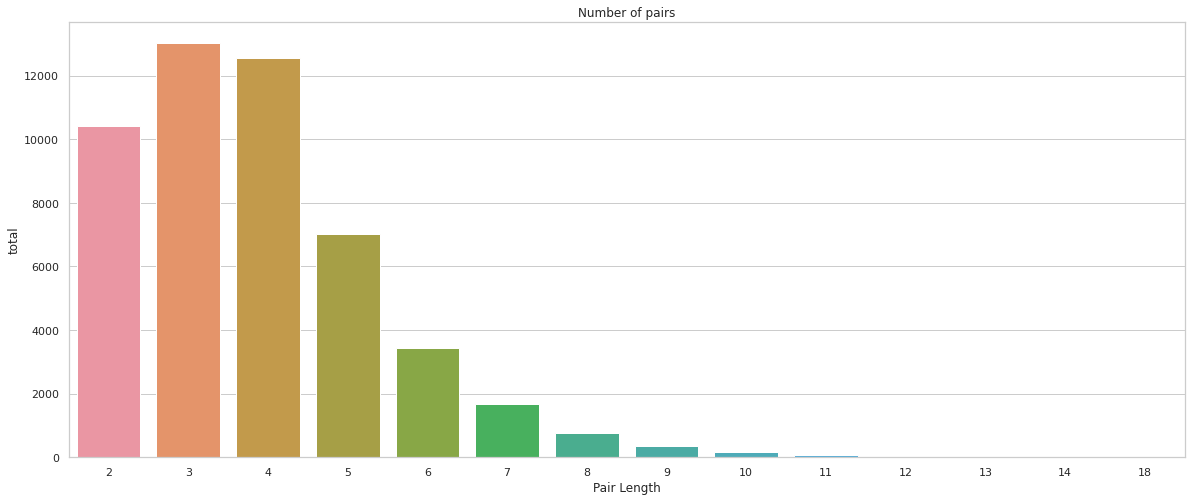

In [3]:
# Balanceamento quantidade de pares por comprimento
# Balanceamento df_with_oov
plt.figure(figsize=(20, 8))
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
df_with_oov_ratio['total'] = df_with_oov_ratio['true'] + df_with_oov_ratio['false']
ax = sns.barplot(x="len_total", y="total", data=df_with_oov_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"Number of pairs")
plt.show()


### DEV - inglês
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
 - Legenda: Número de pares positivo para cada comprimento do par

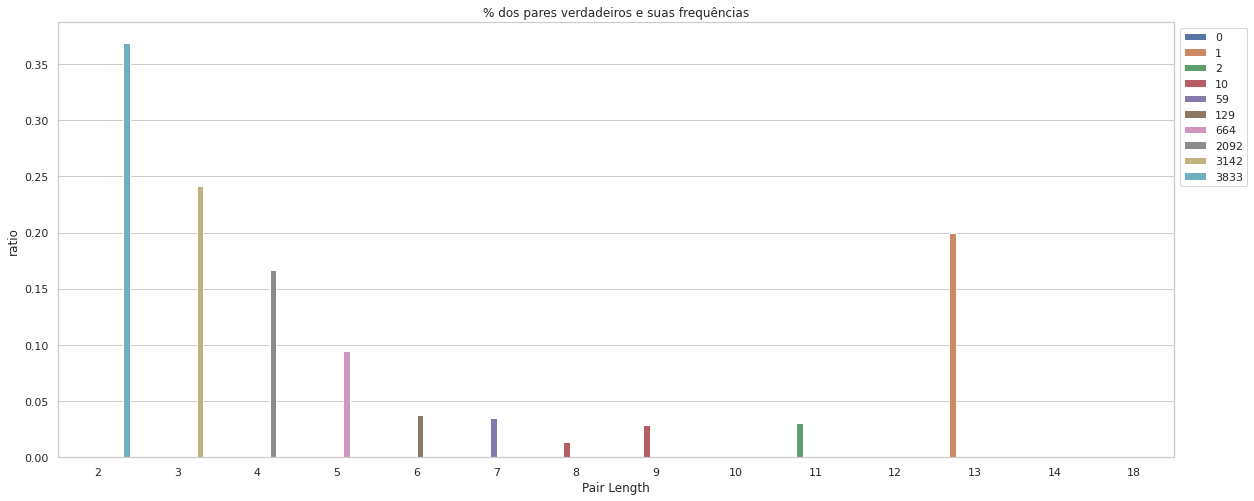

In [4]:
# Balanceamento DEV en
# Balanceamento df_with_oov
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### DEV - inglês
#### AP por padrão. Usado para selecionar os melhores padrões
#### Score é BERT - Log(Z)

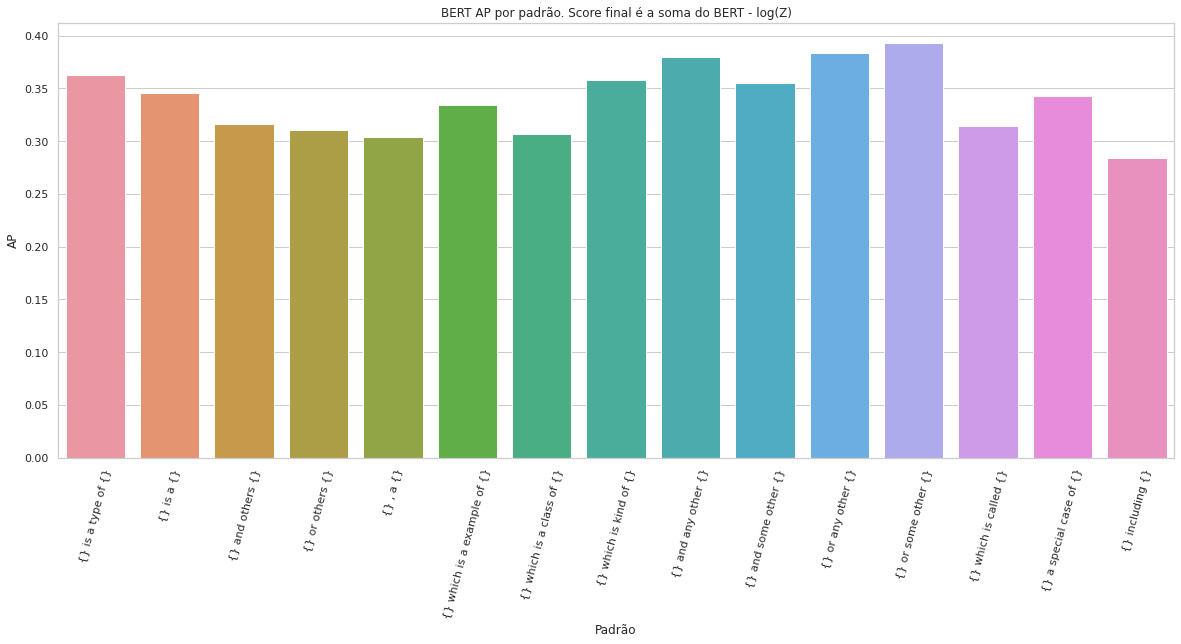

Melhores padrões usando BERT - log(Z)
['{} or some other {}', '{} or any other {}', '{} and any other {}', '{} is a type of {}', '{} which is kind of {}', '{} and some other {}', '{} is a {}', '{} a special case of {}', '{} which is a example of {}', '{} and others {}', '{} which is called {}', '{} or others {}', '{} which is a class of {}', '{} , a {}', '{} including {}']


In [5]:
# AP por padrao DEV en
# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando BERT - log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

### DEV - inglês
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)


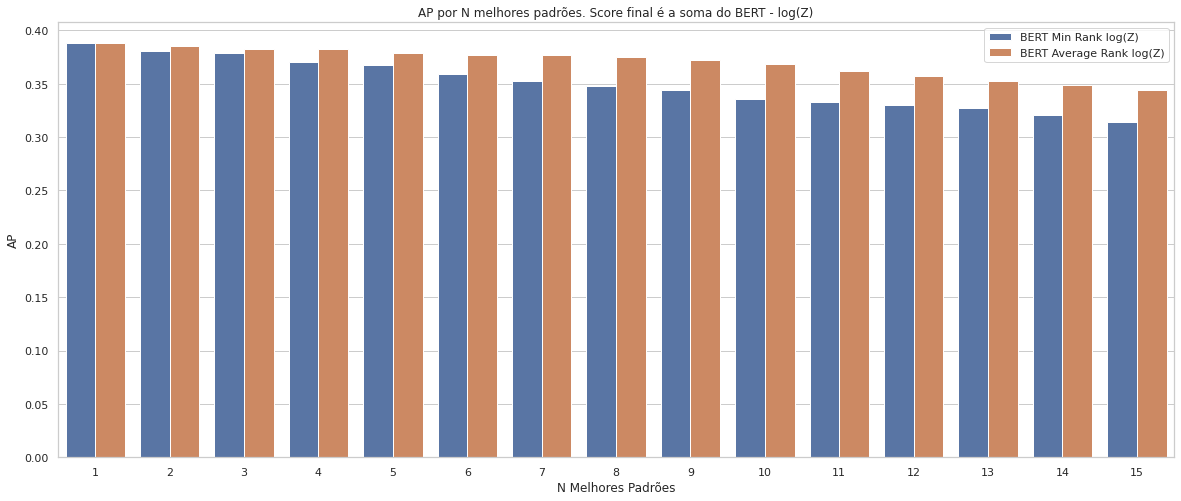

In [6]:
# AP por N melhores padroes DEV EN
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### DEV - Inglês
#### Dados do gráfico acima, para visualização em números

In [7]:
# Dados dos gŕaficos acima.
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
1               1  mean score_final_log(z)  0.388062  BERT Average Rank log(Z)
3               2  mean score_final_log(z)  0.385261  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.382827  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.382101  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
0               1  min score_final_log(z)  0.388062  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.381060  BERT Min Rank log(Z)
4               3  min score_final_log(z)  0.379230  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.370547  BERT Min Rank log(Z)


### DEV - inglês - random LogZ
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)


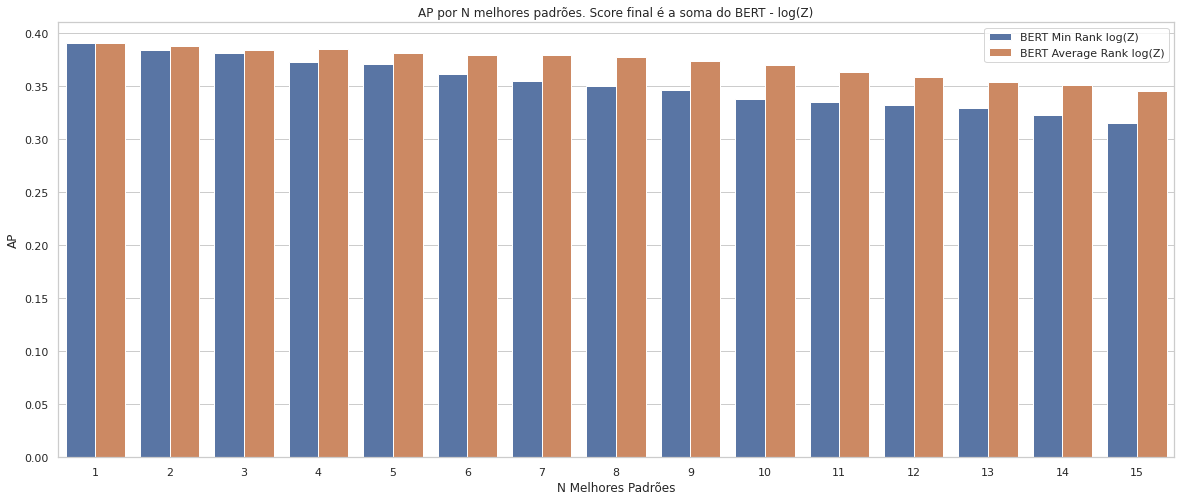

In [8]:
# AP por N melhores padroes DEV EN - randomLogZ
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov_random_logz, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### DEV - Inglês - random LogZ
#### Dados do gráfico acima, para visualização em números

In [9]:
# Dados dos gŕaficos acima.
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
1               1  mean score_final_log(z)  0.390287  BERT Average Rank log(Z)
3               2  mean score_final_log(z)  0.387551  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.384866  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.384250  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
0               1  min score_final_log(z)  0.390287  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.383383  BERT Min Rank log(Z)
4               3  min score_final_log(z)  0.381381  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.372971  BERT Min Rank log(Z)


In [10]:
# Balanceamento true/false
# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

         true        false  total
0  9942.00000  39533.00000  49475
1     0.20095      0.79905      1


In [11]:
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path

# Datasets Test - 10 datasets em inglês
### Usando os 1 melhores padrões do HypeNet-train

In [12]:
# processo demorado
path_json_normal = "../../en-model/bert-base-uncased_bert_score_normal_2020-11-12_15:13:01"

dfs = {}
pattern_unique = {}
filename = ""
for filename in os.listdir(path_json_normal):
    if os.path.isfile(os.path.join(path_json_normal, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_normal, filename))), combination=False, separator="\t")
        df['tipo'] = 'normal'
        dfs[filename + " normal"] = df
pattern_unique['normal'] = df['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
pattern_unique = pattern_unique['normal']

df_ratios = []
for dataset_name in dfs.keys():
    print(dataset_name)
    dname, type_dataset = dataset_name.split()
    df_ratio = nb_utils.balanceamento(dfs[dataset_name], len_size=len_total_unique, patterns=pattern_unique)
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = type_dataset
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

dfs2 = {}
for dataset_name, df in dfs.items():
    dname, type_dataset = dataset_name.split()
    max_pair_length = df[df.pattern == pattern_unique[0]]['len_total'].value_counts().max()   
    dfs2[dname + " logZ"] = nb_utils.logsumexp_normalization(df, len_list=len_total_unique, pattern_list=pattern_unique)
    dfs2[dname + " randomlogZ"] = nb_utils.logsumexp_random_logZ(df, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length)

dfs = dfs2
del dfs2

print("Processamento pronto")

wordnet_test.json normal
Balanceamento: [1, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
baroni2012.json normal
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
HypeNet_test.json normal
Balanceamento: [1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
Weeds.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
kotlerman2010.json normal
Balanceamento: [1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
EVALution.json normal
Balanceamento: [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
LenciBenotto.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no da

### Test - inglês 10 datasets
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização


<Figure size 1440x576 with 0 Axes>

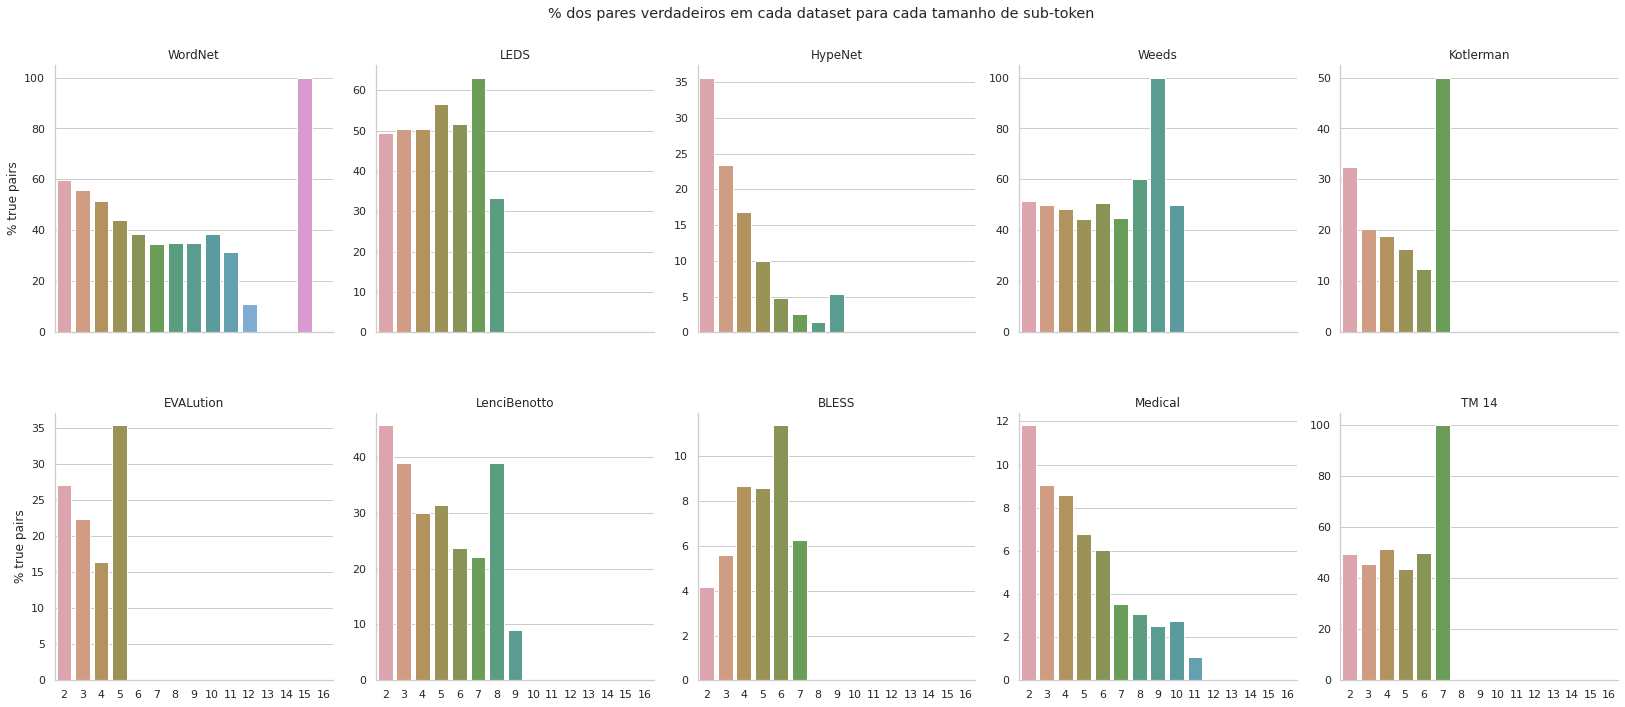

In [13]:
df_ratios['dataset_format'] = df_ratios['dataset'].map(nb_utils.get_dataset_names())
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']

# Balanceamento true/false por comprimento de par
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(20,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% true pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

### Test - inglês 10 datasets
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Número de pares para cada comprimento de par
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1440x576 with 0 Axes>

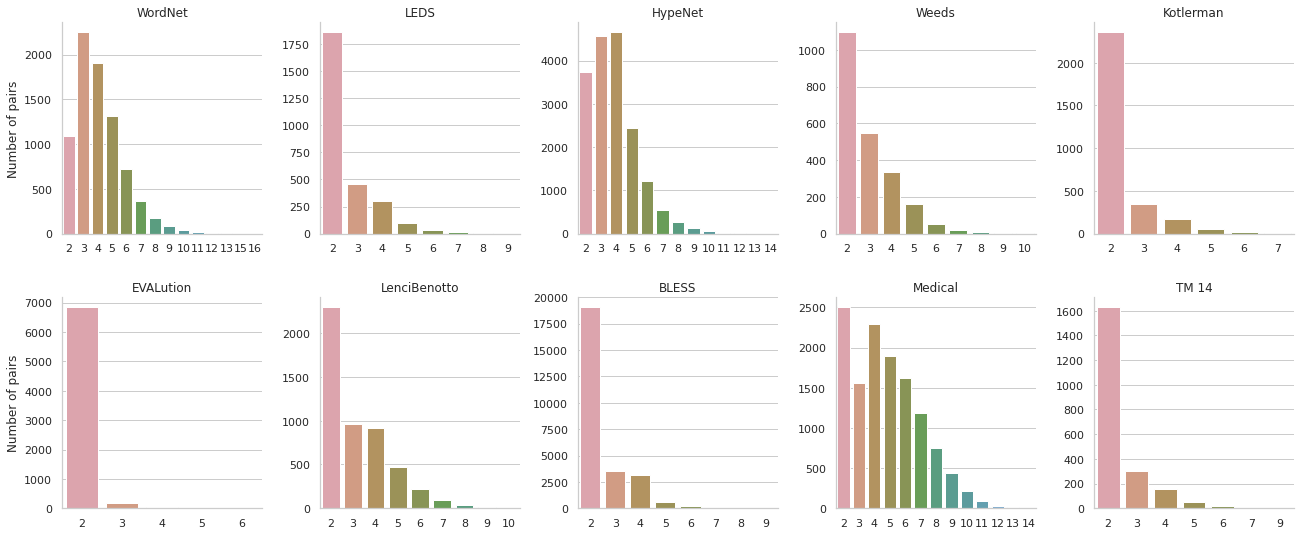

In [14]:
# Balanceamento número de pares por comprimento do par
# Quantidade de pares por tamanho de subtoken
plt.figure(figsize=(20,8))
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']


g = sns.catplot(x="len_total", y="total", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", height=4.0, ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "Number of pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('pair_length_datasets_en.pdf')

# _ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

In [15]:
df_en = []
dfs2 = []
best_pattern_train = nb_utils.best_pattern_HypeNet_train_logz

# seleciona o número de melhores pares para calcular o AP
best_pattern_num_train = 2
for dataset_name in dfs.keys():
    dname, type_dataset = dataset_name.split()
    # type_dataset == 'logZ' or 'randomLogZ'
    df_temp= nb_utils.compute_min_mean_ap_normal(dfs[dataset_name],
        pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
    df_temp['tipo'] = type_dataset
    dfs2.append(df_temp)
    df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                            best_pattern_num=best_pattern_num_train, tipo='normal')
    df_temp['tipo'] = "normal"
    dfs2.append(df_temp)

df_en = pd.concat(dfs2)

### Test
### AP para cada método (BERT, DIVE e Word2vec)
#### Usando BERT - Log(Z) e BERT - Log(Z) random pairs

 - BERT com e sem Log(Z)
 - Ordem dos algoritmo na legenda:
    - BERT Min rank Log(Z)
    - BERT Average rank Log(Z)
    - BERT Min rank
    - BERT Average rank
    - BERT Min rank Log(Z) - Random pairs
    - BERT Average rank Log(Z) - Random pairs
    - Word2vec C
    - DIVE DeltaS * C


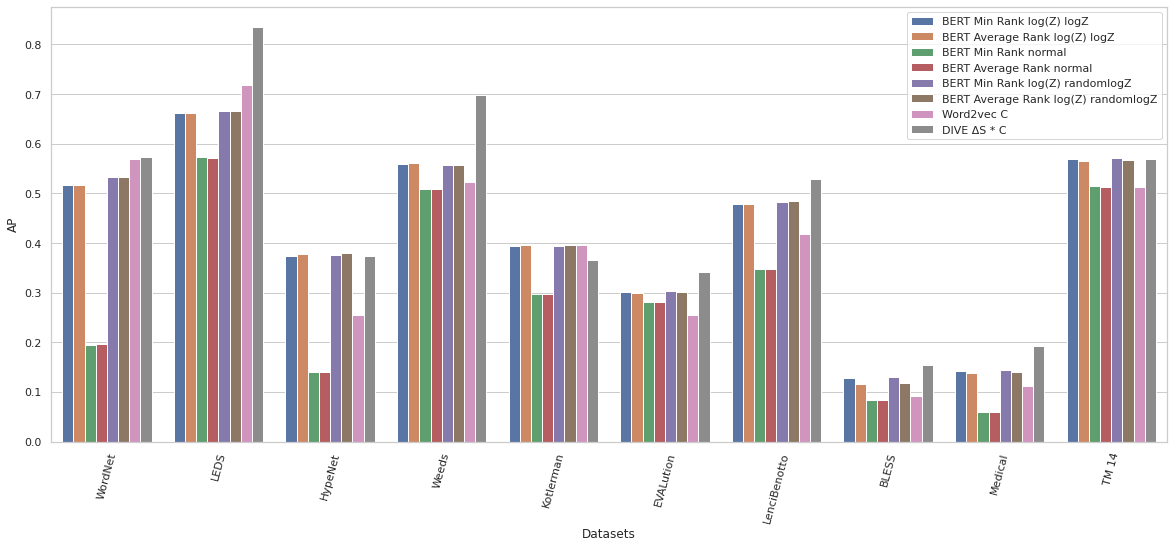

<Figure size 1440x576 with 0 Axes>

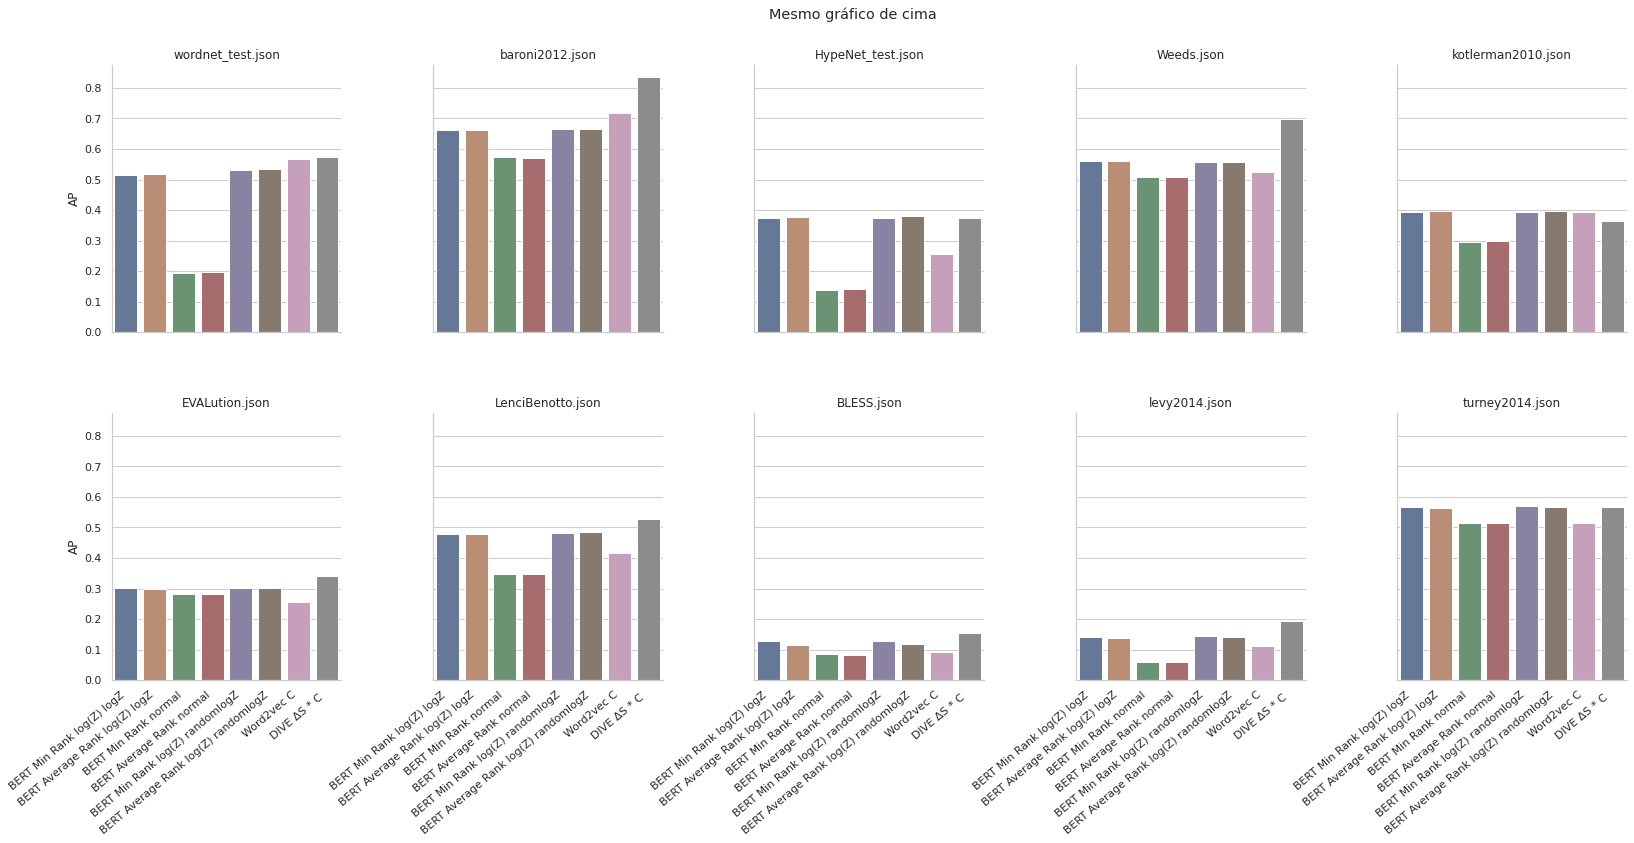

In [16]:
df_dive = nb_utils.get_df_dive()
df_dive['method_format_tipo'] = df_dive['method'].map(nb_utils.get_method_name_ijcai())

# AP por método
df_en['method_format_tipo'] = df_en['method_format'].map(nb_utils.get_method_name_ijcai())
df_en['method_format_tipo'] += " " + df_en['tipo'] 
df_en = pd.concat([df_en, df_dive])
df_en['dataset_format'] = df_en['dataset'].map(nb_utils.get_dataset_names())
plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset_format' ,hue="method_format_tipo", y="AP", ci="sd",data=df_en)
ax.set(xlabel="Datasets")
# ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
#              f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)
plt.savefig('fig_ap_datasetsEn_p2.pdf')
plt.show()


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format_tipo", y="AP", col="dataset", col_wrap=5,
                data=df_en, saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')
plt.show()

### Test - inglês 10 datasets
#### Stats
 - Dados dos gráficos acima para exportar e vizualizar

In [17]:
# dados dos graficos acima
# print contagem
df_print = df_ratios.groupby(['dataset', 'tipo']).sum()[['true', 'false', 'total']]
df_print['ratio'] = df_print['true'] / df_print['total']
print(df_print)

# df to csv
df_en['dataset_format'] = df_en['dataset'].map(nb_utils.get_dataset_names())
group_list = ['dataset_format', 'tipo','method_format_tipo', 'AP', 'N', 'hyper_num']
df_csv = df_en[group_list]
df_csv = df_csv.sort_values(by=group_list[:2])
df_csv['AP'] = df_csv['AP'].round(4)
table = pd.pivot_table(df_csv, values='AP', index="dataset_format", columns=['method_format_tipo'])
# print(table)
# table.to_csv("ap_datasetsEn_p2.csv",index=True)

                           true  false  total     ratio
dataset            tipo                                
BLESS.json         normal  1337  25195  26532  0.050392
EVALution.json     normal  1911   5196   7107  0.268890
HypeNet_test.json  normal  3512  14158  17670  0.198755
LenciBenotto.json  normal  1933   3077   5010  0.385828
Weeds.json         normal  1119   1114   2233  0.501120
baroni2012.json    normal  1385   1385   2770  0.500000
kotlerman2010.json normal   880   2060   2940  0.299320
levy2014.json      normal   945  11657  12602  0.074988
turney2014.json    normal  1058   1100   2158  0.490269
wordnet_test.json  normal  3994   3996   7990  0.499875


In [18]:
# reset
%reset_selective -f df
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path
%reset_selective -f best
%reset_selective -f max_
%reset_selective -f pattern

_________________________

_________________________

_________________________


# PT-BR
## BERT base neuralmind, cased
### Dataset DEV onto-validation
## Usando wikipedia240M para comparação
 - Sem OOV = 42800 pares
 - com OOV = 94446 pares

In [19]:
vocabs = ["../../vocabs/wikipedia15M/vocab.txt",
          "../../vocabs/wikipedia30M/vocab.txt",
          "../../vocabs/wikipedia60M/vocab.txt",
          "../../vocabs/wikipedia120M/vocab.txt",
          "../../vocabs/wikipedia240M/vocab.txt"]
# data DEV ontoPT
# server
# path_file_bert = "/home/gabrielescobar/hyper_bert/teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-validation.json"
#local
path_file_bert = "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-validation.json"

json_data = json.load(open(path_file_bert))
df_240 = nb_utils.create_dataframe(nb_utils.filter_by_vocab(vocabs[4], json_data), separator=" ")
df_with_oov = nb_utils.create_dataframe(json_data, separator=" ")
pattern_unique = df_with_oov['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]



#server random pairs pt-br
path_file_random = "../../models/neuralmind-bert-base-portuguese-cased_bert_score_2021-02-05_08:55:36/BRrandom.json"
df_random = nb_utils.create_dataframe(json.load(open(path_file_random)), separator="\t")




print(f"DF 240 = {df_240[df_240['pattern'] == pattern_unique[0]].count()['hiponimo']}")
print(f"DF all with OOV = {df_with_oov[df_with_oov['pattern'] == pattern_unique[0]].count()['hiponimo']}")


max_pair_length_240 = df_240[df_240.pattern == pattern_unique[0]]['len_total'].value_counts().max()

# df sem oov e random logz
df_240_random_logz = nb_utils.logsumexp_random_logZ(df_240, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length_240)


# df 240M sem oov
df_240 = nb_utils.logsumexp_normalization(df_240, len_list=len_total_unique, pattern_list=pattern_unique)
print("Processamento completo!")

DF 240 = 42800
DF all with OOV = 94446
Processamento completo!


### DEV Balanceamento do ontoPT-validation SEM OOV
#### Wikipedia 240M sem OOV
 - N = 42800 pares


 ### DEV - ontoPT SEM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Quantidade de pares por comprimento

Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


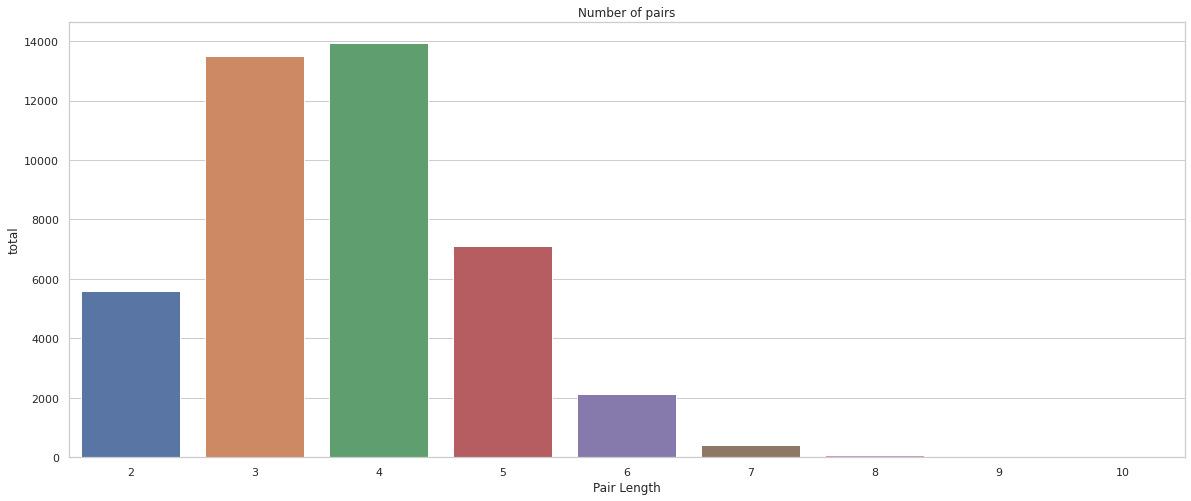

In [20]:
# Balanceamento quantidade de pares por comprimento
# Balanceamento df_with_oov
plt.figure(figsize=(20, 8))
df_240_ratio = nb_utils.balanceamento(df_240, patterns=pattern_unique,len_size=len_total_unique)
df_240_ratio['total'] = df_240_ratio['true'] + df_240_ratio['false']
ax = sns.barplot(x="len_total", y="total", data=df_240_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"Number of pairs")
plt.show()


## DEV - ontoPT SEM OOV
### stats
#### Gŕaficos do BERT - log(Z) no DEV português
    - Eixo X: Comprimento do par
    - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
    - Legenda: Número de pares positivo para cada comprimento do par

Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


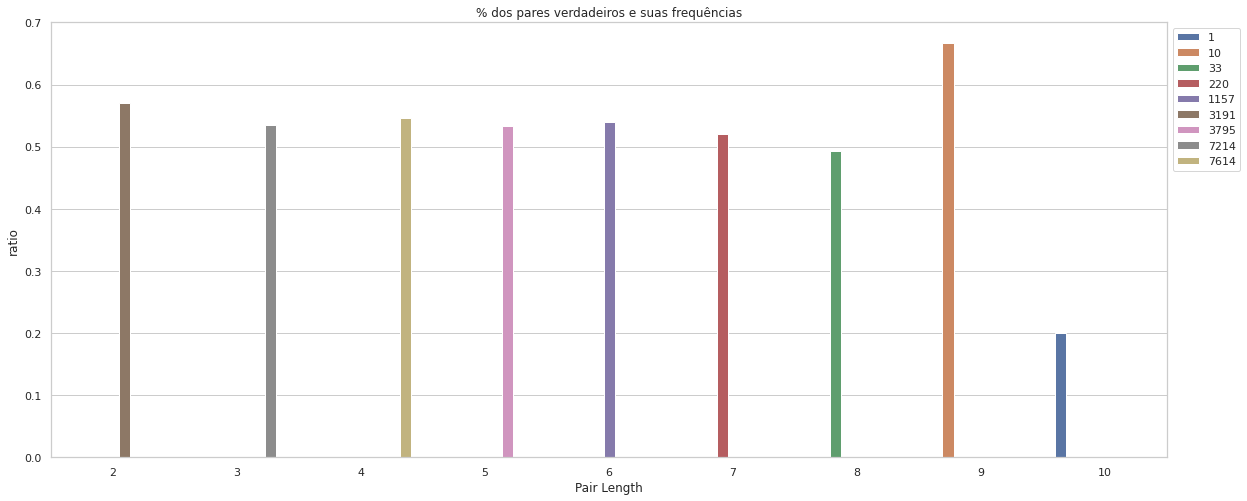

In [21]:
%reset_selective -f json_data

# Balanceamento DEV sem oov
# Porcentagem de pares verdadeiros por comprimento do par
df_240_ratio = nb_utils.balanceamento(df_240, len_size=len_total_unique, patterns=pattern_unique)

plt.figure(figsize=(20, 8))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_240_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

## DEV - ontoPT SEM OOV
### stats
#### Gŕaficos do BERT - log(Z) no DEV português

#### AP por padrão. Usado para selecionar os melhores padrões
#### Score é BERT - Log(Z)

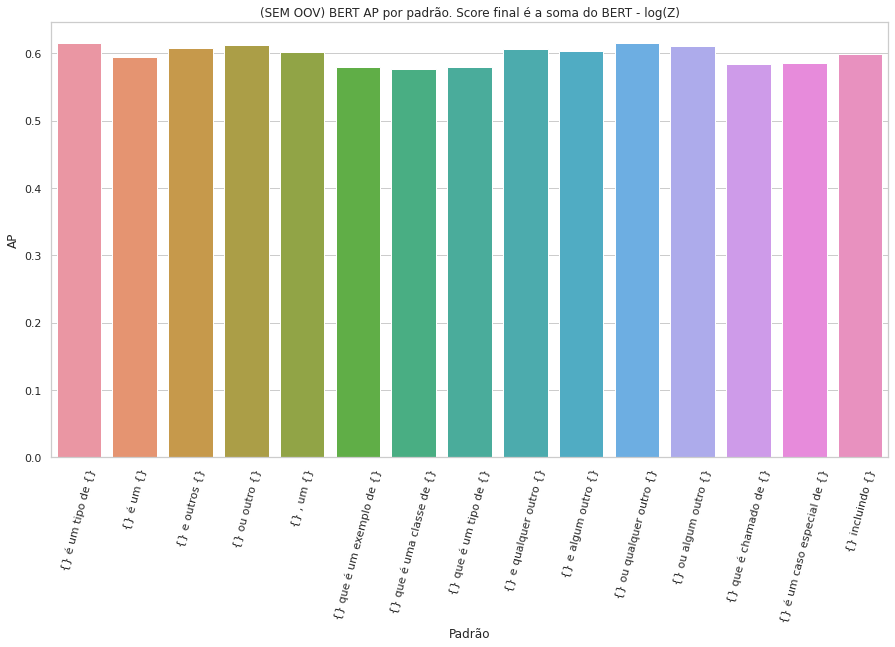

Melhores padrões usando score_final_log(Z)
['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']


In [22]:
# AP DEV ontoPT sem oov
# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_240, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"(SEM OOV) BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando score_final_log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

## DEV - ontoPT SEM OOV
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

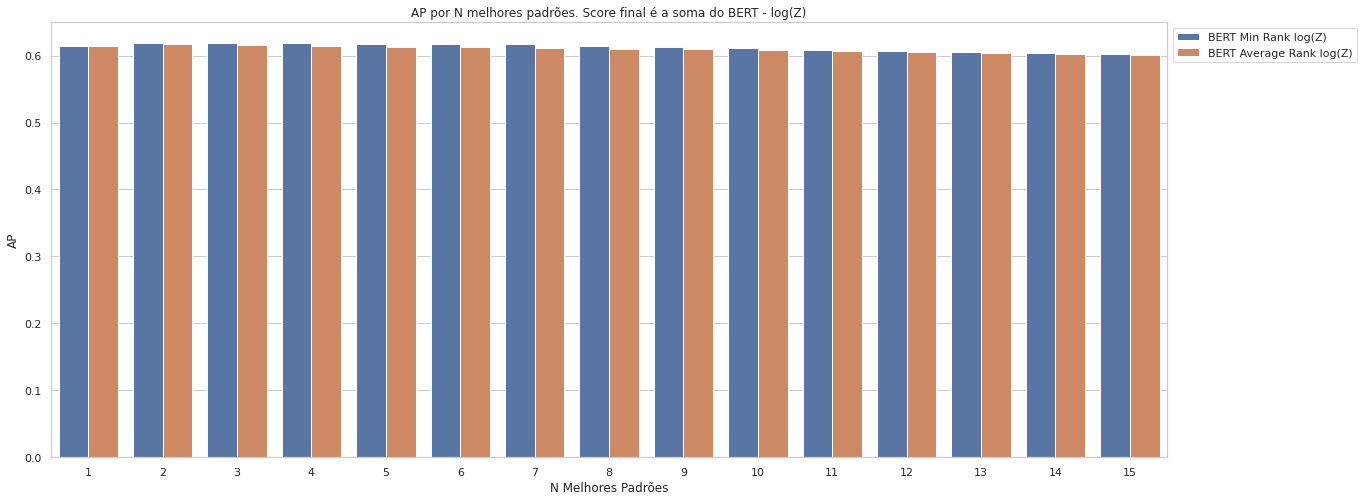

In [23]:
# DEV ontoPT sem oov
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_240, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [24]:
# dados dos gráficos acima
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_240, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.616772  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.615469  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.614867  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.614425  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.618626  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.618578  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.618106  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.618013  BERT Min Rank log(Z)
           true         false  total
0  23235.000000  19565.000000  42800
1      0.542874 

## DEV - ontoPT SEM OOV - Random pairs LogZ
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

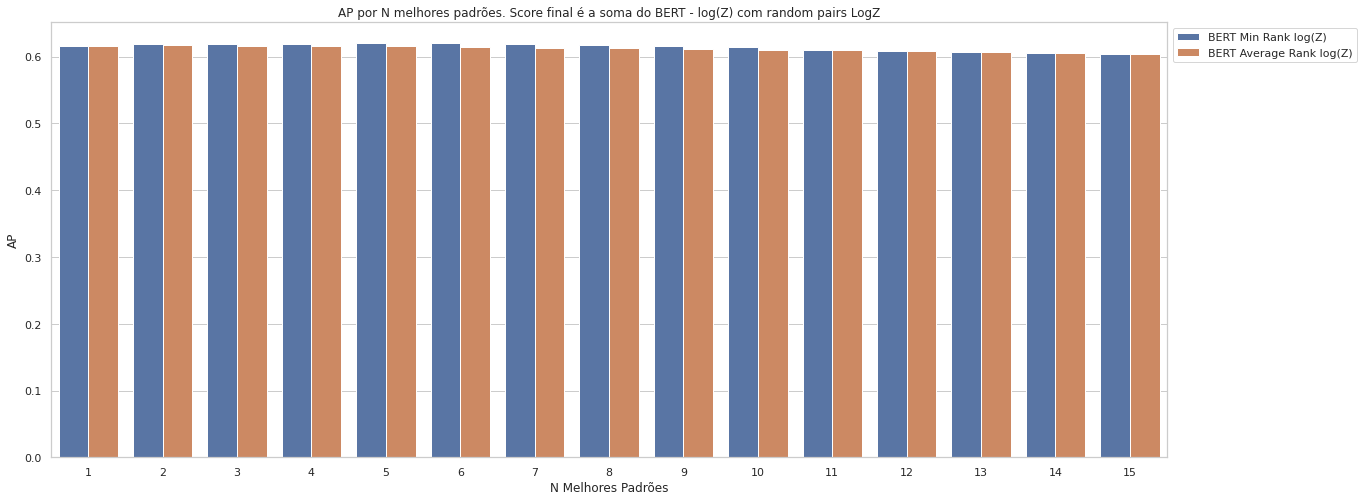

In [25]:
# DEV ontoPT sem oov - random pairs
# AP por n-rank

df_plot = nb_utils.compute_AP_n_best_pattern(df_240_random_logz, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z) com random pairs LogZ")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [26]:
# dados dos gráficos acima
# com random pairs logZ
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_240, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.617601  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.616262  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.616057  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.615470  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
    n_best_pattern                  method        AP         method_format
8                5  min score_final_log(z)  0.620318  BERT Min Rank log(Z)
10               6  min score_final_log(z)  0.619979  BERT Min Rank log(Z)
2                2  min score_final_log(z)  0.619446  BERT Min Rank log(Z)
12               7  min score_final_log(z)  0.619408  BERT Min Rank log(Z)
           true         false  total
0  23235.000000  19565.000000  42800
1      0.54

In [27]:
# reset
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path


### DEV Balanceamento do ontoPT-validation COM OOV
#### Wikipedia 240M com OOV
 - N = 94446 pares

### DEV - ontoPT COM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Quantidade de pares por comprimento

Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


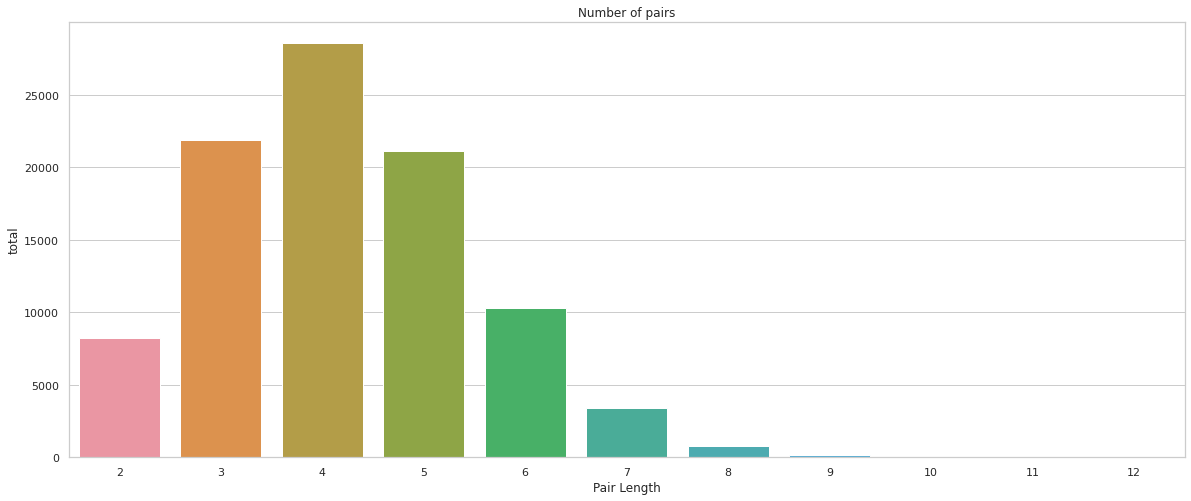

In [28]:
# df com oov

max_pair_length_with_oov_random = df_with_oov[df_with_oov.pattern == pattern_unique[0]]['len_total'].value_counts().max()

df_with_oov_random_logz = nb_utils.logsumexp_random_logZ(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length_with_oov_random)

df_with_oov = nb_utils.logsumexp_normalization(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique)
# Balanceamento quantidade de pares por comprimento
# Balanceamento df_with_oov
plt.figure(figsize=(20, 8))
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
df_with_oov_ratio['total'] = df_with_oov_ratio['true'] + df_with_oov_ratio['false']
ax = sns.barplot(x="len_total", y="total", data=df_with_oov_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"Number of pairs")
plt.show()


## DEV - ontoPT COM OOV
### stats
    - Eixo X: Comprimento do par
    - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
    - Legenda: Número de pares positivo para cada comprimento do par

Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


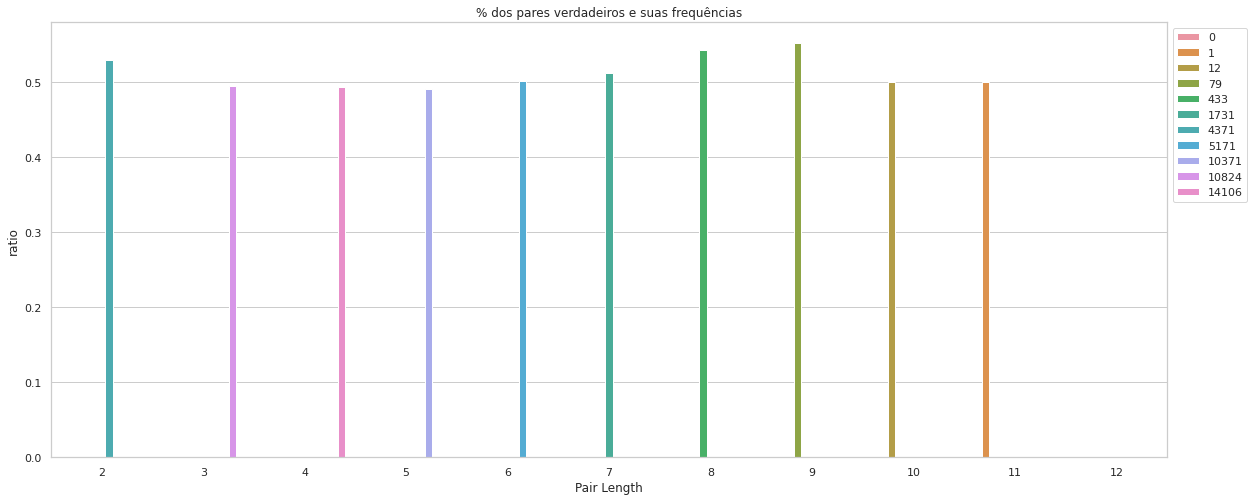

In [29]:
%reset_selective -f json_data

# Balanceamento DEV sem oov
# Porcentagem de pares verdadeiros por comprimento do par
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, len_size=len_total_unique, patterns=pattern_unique)

plt.figure(figsize=(20, 8))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

## DEV - ontoPT COM OOV
### stats
#### Gŕaficos do BERT - log(Z) no DEV português

#### AP por padrão. Usado para selecionar os melhores padrões
#### Score é BERT - Log(Z)

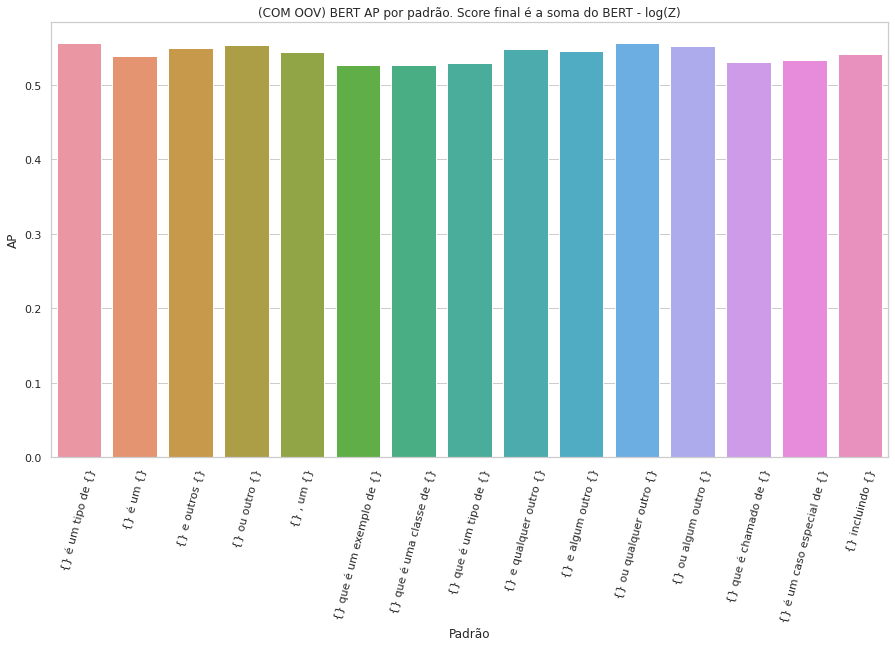

Melhores padrões usando score_final_log(Z)
['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']


In [30]:
# AP DEV ontoPT com oov
# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"(COM OOV) BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando score_final_log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

## DEV - ontoPT COM OOV
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

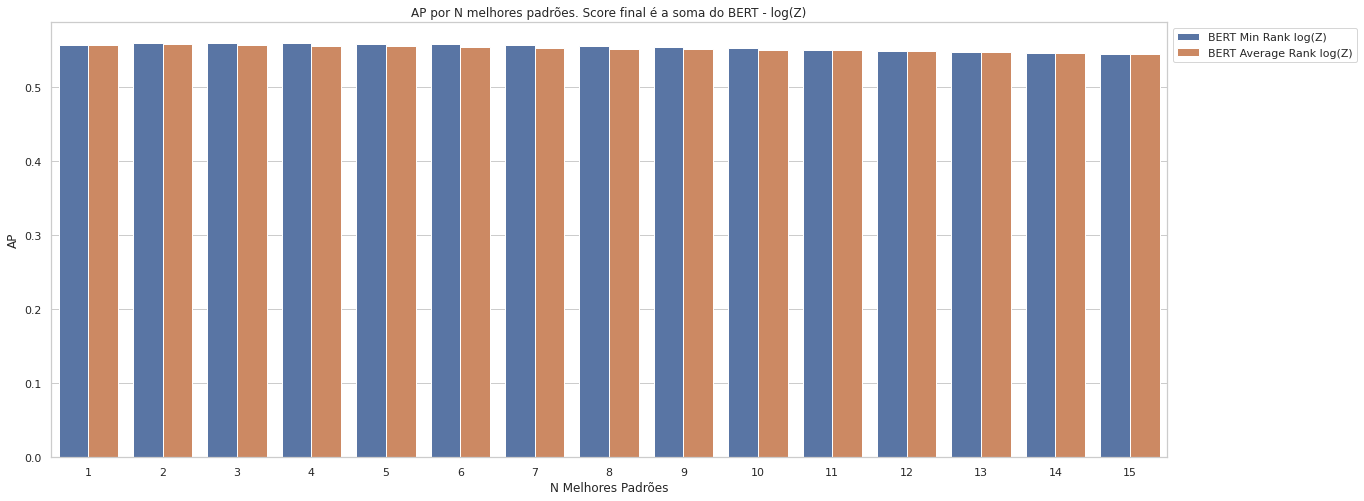

In [31]:
# DEV ontoPT sem oov
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 _____
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [32]:
# dados dos gráficos acima
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.557288  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.556178  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.555868  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.555246  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.558960  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.558936  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.558514  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.558157  BERT Min Rank log(Z)
           true         false  total
0  47099.000000  47347.000000  94446
1      0.498687 

## DEV - ontoPT COM OOV - random pairs LogZ
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

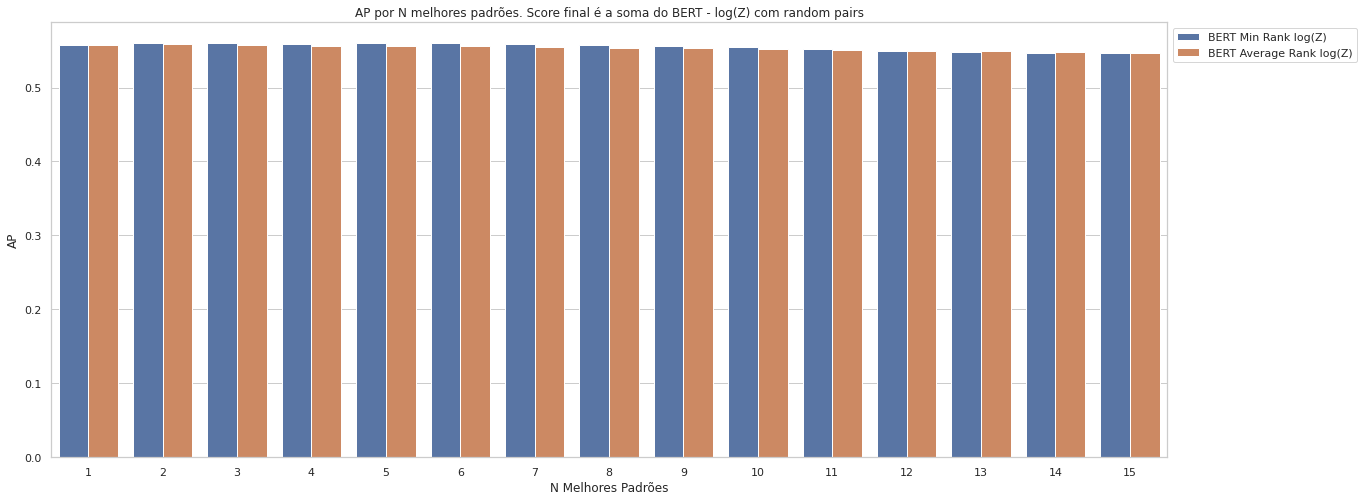

In [33]:
# DEV ontoPT sem oov
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov_random_logz, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z) com random pairs")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 _____
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [34]:
# dados dos gráficos acima
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.558263  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.557344  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.556950  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.556294  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
    n_best_pattern                  method        AP         method_format
8                5  min score_final_log(z)  0.560051  BERT Min Rank log(Z)
2                2  min score_final_log(z)  0.559940  BERT Min Rank log(Z)
10               6  min score_final_log(z)  0.559606  BERT Min Rank log(Z)
4                3  min score_final_log(z)  0.559562  BERT Min Rank log(Z)
           true         false  total
0  47099.000000  47347.000000  94446
1      0.49

In [35]:
# reset
%reset_selective -f df
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path

-----------------

# Test nos datasets PT-BR


## Test datasets
 - conceptnet-hypernym-1
 - conceptnet-hypernym-all-relation
 - ontoPT-test

In [41]:
# data path server
path_file_bert = ["../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-1.json",
                 "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-allrelation.json",
                 "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-test.json"]

if local:
    # path local
    path_d_w = ["/home/gabrielescobar/Documentos/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_not_oov/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv",
                "/home/gabrielescobar/Documentos/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv"]
else:
    # path server
    path_d_w = ["/home/gabrielescobar/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_not_oov/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv",
            "/home/gabrielescobar/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv"]

df_dive_word2vec = pd.read_csv(path_d_w[0], delimiter="\t")
df_dive_word2vec = df_dive_word2vec[df_dive_word2vec['epoch_num'] == 14]
df_240 = {}
df_with_oov = {}
for path_bert_dataset in path_file_bert:
    dname = path_bert_dataset.split("/")[-1][:-4] + "tsv"
    json_data = json.load(open(path_bert_dataset))
    df_240[dname] = nb_utils.create_dataframe(nb_utils.filter_by_vocab(vocabs[4], json_data), separator=" ")
    df_with_oov[dname] = nb_utils.create_dataframe(json_data, separator=" ")

pattern_unique = df_with_oov[dname]['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df_ratios = []
for dname in df_240.keys():
    print(dname)
    df_now = df_240[dname]
    print(f"DF 240 = {df_now[df_now['pattern'] == pattern_unique[0]].count()['hiponimo']}")
    df_ratio = nb_utils.balanceamento(df_now, len_size=len_total_unique, patterns=pattern_unique)
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = 'sem OOV'
    df_ratios.append(df_ratio)
    df_now = df_with_oov[dname]
    print(f"DF all with OOV = {df_now[df_now['pattern'] == pattern_unique[0]].count()['hiponimo']}")
    df_ratio = nb_utils.balanceamento(df_now, len_size=len_total_unique, patterns=pattern_unique)
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = 'com OOV'
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

# df com oov
for dname in df_with_oov.keys():
    df_with_oov[dname] = nb_utils.logsumexp_normalization(df_with_oov[dname], len_list=len_total_unique, pattern_list=pattern_unique)

# df 240M sem oov
for dname in df_240.keys():
    df_240[dname] = nb_utils.logsumexp_normalization(df_240[dname], len_list=len_total_unique, pattern_list=pattern_unique)


conceptnet-hypernym-1.tsv
DF 240 = 2440
Balanceamento: [1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
DF all with OOV = 4646
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
conceptnet-hypernym-allrelation.tsv
DF 240 = 14330
Balanceamento: [1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
DF all with OOV = 30474
Balanceamento: [1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
ontoPT-test.tsv
DF 240 = 388927
Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
DF all with OOV = 850006
Balanceamento: [1, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


## Estatística Test datasets PT-BR - SEM OOV

<Figure size 1440x576 with 0 Axes>

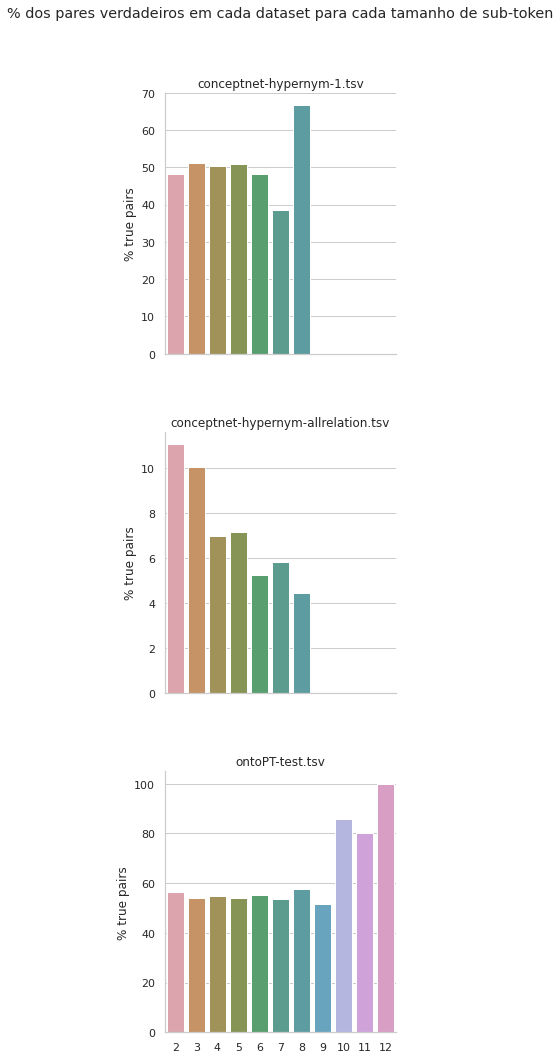

In [45]:
df_ratios['dataset_format'] = df_ratios['dataset']
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'sem OOV']

# Balanceamento true/false por comprimento de par
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(20,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_format", col_wrap=1,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% true pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

### Estatística Test - PT-BR 3 datasets SEM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Número de pares para cada comprimento de par
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1440x576 with 0 Axes>

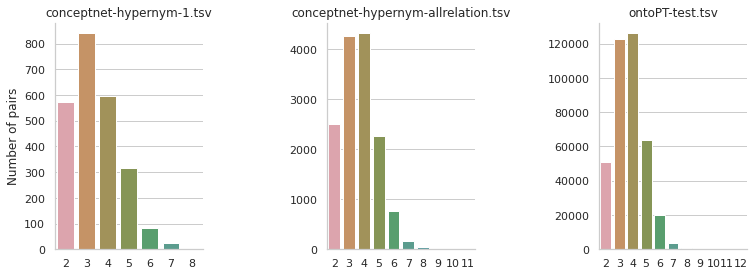

In [46]:
# Balanceamento número de pares por comprimento do par
# Quantidade de pares por tamanho de subtoken
plt.figure(figsize=(20,8))
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'sem OOV']


g = sns.catplot(x="len_total", y="total", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", height=4.0, ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "Number of pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('pair_length_datasets_en.pdf')

# _ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

## Estatística Test datasets PT-BR - COM OOV

<Figure size 1440x576 with 0 Axes>

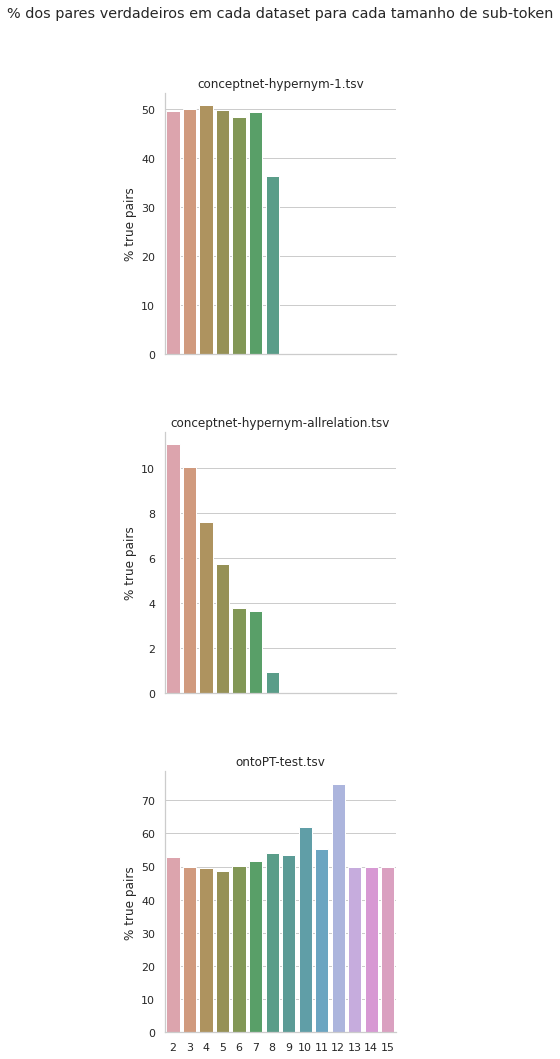

In [47]:
df_ratios['dataset_format'] = df_ratios['dataset']
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'com OOV']

# Balanceamento true/false por comprimento de par
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(20,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_format", col_wrap=1,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% true pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

### Estatística Test - PT-BR 3 datasets COM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Número de pares para cada comprimento de par
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1440x576 with 0 Axes>

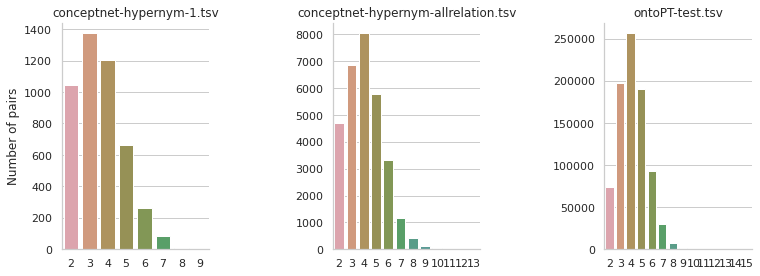

In [48]:
# Balanceamento número de pares por comprimento do par
# Quantidade de pares por tamanho de subtoken
plt.figure(figsize=(20,8))
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'com OOV']


g = sns.catplot(x="len_total", y="total", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", height=4.0, ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "Number of pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('pair_length_datasets_en.pdf')

# _ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

______________________

## Test SEM OOV
 - Com 2 melhores padrões

In [55]:
# df sem oov
best_pattern_without_oov = ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']
test= ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']
assert len(best_pattern_without_oov) == 15
assert test == best_pattern_without_oov


dfs = []
best_pattern_num_train = 2
for dname in df_240.keys():
    print(dname)
    df_temp = nb_utils.compute_min_mean_ap_normal(df_240[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                              best_pattern_num=best_pattern_num_train)

    df_temp['tipo'] = "log(Z)"

    dfs.append(df_temp)
    
    df_temp = nb_utils.compute_ap_bert_soma(df_240[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                            best_pattern_num=best_pattern_num_train, tipo='normal')
    df_temp['tipo'] = "normal"
    dfs.append(df_temp)
df_all = pd.concat(dfs)
df_all = pd.concat([df_all, df_dive_word2vec])
df_all['method_format'] = df_all['method'].map(nb_utils.get_method_name_ijcai())
datasetnames_unique = df_all['dataset'].unique().tolist()
rename_dataset = {}
for k in datasetnames_unique:
    rename_dataset[k] = os.path.basename(k)

df_all['dataset'] = df_all['dataset'].map(rename_dataset)


conceptnet-hypernym-1.tsv
conceptnet-hypernym-allrelation.tsv
ontoPT-test.tsv


#### Test Gŕaficos do BERT log_sum_exp log(Z) em português SEM OOV

 - AP combinando os N melhores padrões (Average rank e Min rank); N=2
 - conceptnet-hypernym-1 N = 2440
  - True = 49.95%; False = 50.05%
 - conceptnet-hypernym-allrelation N = 14330
  - True = 8.5%; False = 91.5 %


['BERT Min Rank log(Z)', 'BERT Average Rank log(Z)', 'BERT Min Pos Rank', 'BERT Mean Pos Rank', 'Word2vec C', 'random', 'DIVE ΔS', 'DIVE ΔS * Word2vec C', 'DIVE C', 'DIVE ΔS * C ']
['BERT Min Rank log(Z)', 'BERT Average Rank log(Z)', 'Word2vec C', 'random', 'DIVE ΔS * C ']


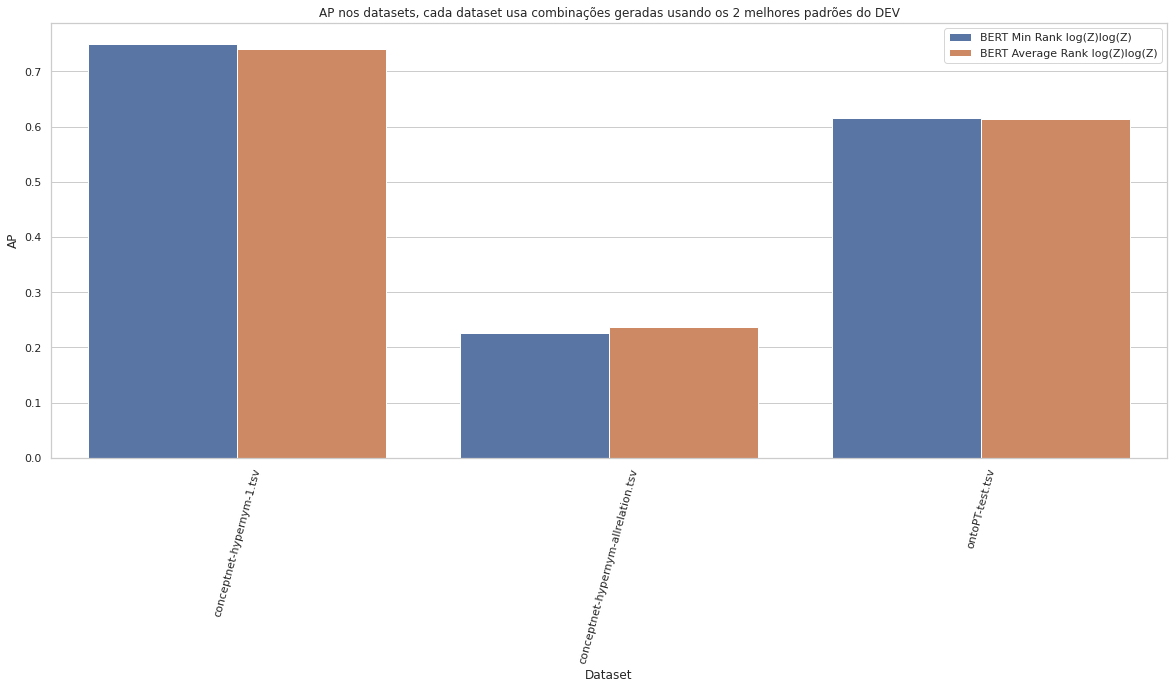

<Figure size 1440x576 with 0 Axes>

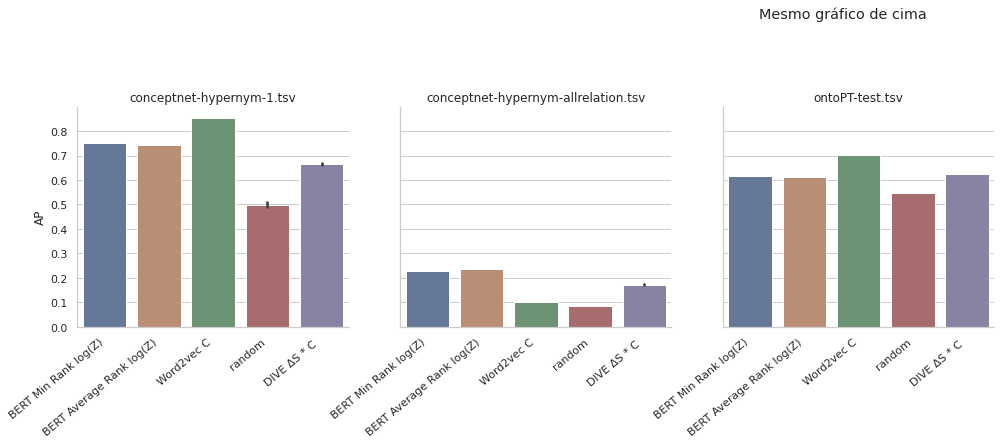

In [54]:
def filter_methods_ijcai(df):
    print(df['method_format'].unique().tolist())
    method_names = ['Word2vec C', 'DIVE \u0394S * C ', 'random',
                    'BERT Average Rank log(Z)', 'BERT Min Rank log(Z)',  ]
    return df[df['method_format'].isin(method_names)]

df_all = filter_methods_ijcai(df_all)
df_all['method_format_tipo'] = df_all['method_format'] + df_all['tipo']

plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format_tipo", y="AP", ci="sd",data=df_all)
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format", y="AP", col="dataset", col_wrap=5,
                data=filter_methods_ijcai(df_all), saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.7, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')

In [ ]:
# balanceamento do dataset inteiro
for dname in df_240.keys():
    df_size = nb_utils.balanceamento_all(df_240[dname], patterns=pattern_unique)
    print(dname)
    print(df_size)


-----------------------

#### Test Gŕaficos do BERT log_sum_exp log(Z) em português COM OOV
#### Todo os exemplos dos datasets

 - AP combinando os N melhores padrões (Average rank e Min rank); N=2
 - conceptnet-hypernym-1 N = 4646
  - True = 50%; False = 50%
 - conceptnet-hypernym-allrelation N = 30474
  - True = 7.6%; False = 92.4%

In [ ]:
# df com oov
# path_d_w [1] == com oov
df_dive_word2vec = pd.read_csv(path_d_w[1], delimiter="\t")
df_dive_word2vec = df_dive_word2vec[df_dive_word2vec['epoch_num'] == 14]
dfs = []
best_pattern_num_train = 2
df_temp = {}
for dname in df_with_oov.keys():
    df_temp[dname] = nb_utils.compute_min_mean_ap_normal(df_with_oov[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                              best_pattern_num=best_pattern_num_train)

    dfs.append(df_temp[dname])
df_all = pd.concat(dfs)
df_all = pd.concat([df_all, df_dive_word2vec])
df_all['method_format'] = df_all['method'].map(nb_utils.get_method_name_ijcai())
datasetnames_unique = df_all['dataset'].unique().tolist()
rename_dataset = {}
for k in datasetnames_unique:
    rename_dataset[k] = os.path.basename(k)

df_all['dataset'] = df_all['dataset'].map(rename_dataset)

In [ ]:

plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format", y="AP", ci="sd",data=filter_methods_ijcai(df_all))
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)

plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format", y="AP", col="dataset", col_wrap=5,
                data=filter_methods_ijcai(df_all), saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.6, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')


In [ ]:
# balanceamento do dataset inteiro
for dname in df_with_oov.keys():
    df_size = nb_utils.balanceamento_all(df_with_oov[dname], patterns=pattern_unique)
    print(dname)
    print(df_size)


In [ ]:
# reset
%reset_selective -f df
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path
%reset_selective -f g
%reset_selective -f legend